# **1. Perkenalan Dataset**


Bank Transaction Dataset for Fraud Detection

sumber: https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection

Himpunan data ini memberikan pandangan terperinci tentang perilaku transaksional dan pola aktivitas keuangan. Dataset ini berisi 2.512 sampel data transaksi, yang mencakup berbagai atribut transaksi, demografi pelanggan, dan pola penggunaan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd # Manipulasi data
import numpy as np  # Operasi numerik
import matplotlib.pyplot as plt # Visualisasi data
import seaborn as sns # Visualisasi data
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler # Normalisasi & encoding data
from sklearn.cluster import KMeans  # Algoritma clustering
from sklearn.metrics import silhouette_score  # Evaluasi model clustering
from sklearn.feature_selection import SelectKBest, f_classif  # Feature Selection
from sklearn.decomposition import PCA # PCA untuk visualisasi clustering

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
# Gantilah ID file dengan ID dari Google Drive URL
file_id = '1zD0H2OhiDNUHlyHoOvQQk8eXCTIQHzue'

# Buat URL unduhan langsung
download_url = f'https://drive.google.com/uc?id={file_id}'

# Baca file CSV dari URL
df = pd.read_csv(download_url)

# Tampilkan DataFrame untuk memastikan telah dibaca dengan benar
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


### Hasil Analisis Awal Dataset

Dataset ini berisi informasi transaksi bank dengan kolom-kolom berikut:

- **TransactionID**: ID unik untuk setiap transaksi  
- **AccountID**: ID akun pelanggan  
- **TransactionAmount**: Jumlah uang dalam transaksi  
- **TransactionDate**: Tanggal dan waktu transaksi  
- **TransactionType**: Jenis transaksi (Debit/Credit)  
- **Location**: Kota tempat transaksi dilakukan  
- **DeviceID & IP Address**: Perangkat dan IP yang digunakan  
- **MerchantID**: ID merchant (penjual)  
- **Channel**: Metode transaksi (ATM/Online)  
- **CustomerAge**: Usia pelanggan  
- **CustomerOccupation**: Pekerjaan pelanggan  
- **TransactionDuration**: Durasi transaksi dalam detik  
- **LoginAttempts**: Jumlah percobaan login sebelum transaksi  
- **AccountBalance**: Saldo akun setelah transaksi  
- **PreviousTransactionDate**: Tanggal transaksi sebelumnya  


In [ ]:
# Cek ulang jumlah baris dan kolom
num_rows, num_cols = df.shape

# Cek apakah ada nilai yang hilang dalam dataset
missing_values = df.isnull().sum()

# Menampilkan ringkasan hasil
num_rows, num_cols, missing_values

(2512,
 16,
 TransactionID              0
 AccountID                  0
 TransactionAmount          0
 TransactionDate            0
 TransactionType            0
 Location                   0
 DeviceID                   0
 IP Address                 0
 MerchantID                 0
 Channel                    0
 CustomerAge                0
 CustomerOccupation         0
 TransactionDuration        0
 LoginAttempts              0
 AccountBalance             0
 PreviousTransactionDate    0
 dtype: int64)

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

<Figure size 1200x600 with 0 Axes>

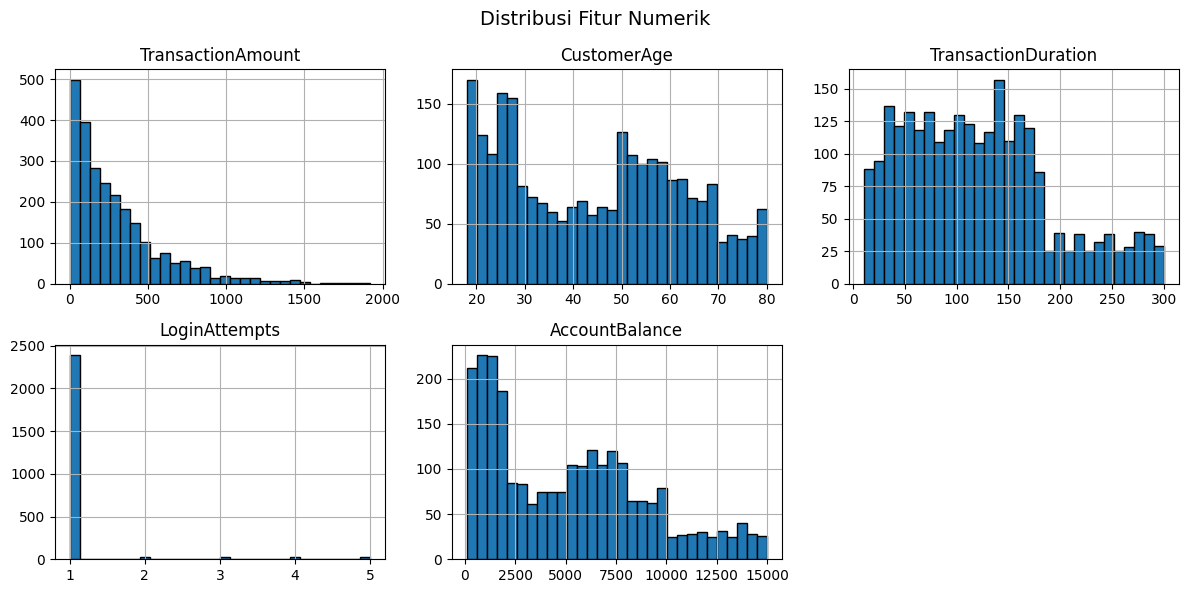

In [ ]:
# Menentukan fitur numerik yang akan dianalisis
numerical_features = ["TransactionAmount", "CustomerAge", "TransactionDuration", "LoginAttempts", "AccountBalance"]

# Visualisasi distribusi fitur numerik dengan histogram
plt.figure(figsize=(12, 6))
df[numerical_features].hist(figsize=(12, 6), bins=30, layout=(2, 3), edgecolor='black')

# Menampilkan plot
plt.suptitle("Distribusi Fitur Numerik", fontsize=14)
plt.tight_layout()
plt.show()

- TransactionAmount : Distribusi skewed ke kanan, menunjukkan banyak transaksi bernilai kecil.  
- CustomerAge : Sebaran cukup merata, dengan lonjakan pada usia muda & tua.  
- TransactionDuration : Sebaran hampir normal, tetapi ada sedikit skew di bagian kanan.  
- LoginAttempts : Mayoritas pelanggan hanya melakukan 1 kali login (data sangat imbalanced).  
- AccountBalance : Distribusi cukup lebar, ada pelanggan dengan saldo rendah & tinggi.  


<ipython-input-6-b0620a6df1f5>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette="viridis", edgecolor="black")
<ipython-input-6-b0620a6df1f5>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette="viridis", edgecolor="black")
<ipython-input-6-b0620a6df1f5>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette="viridis", edgecolor="black")


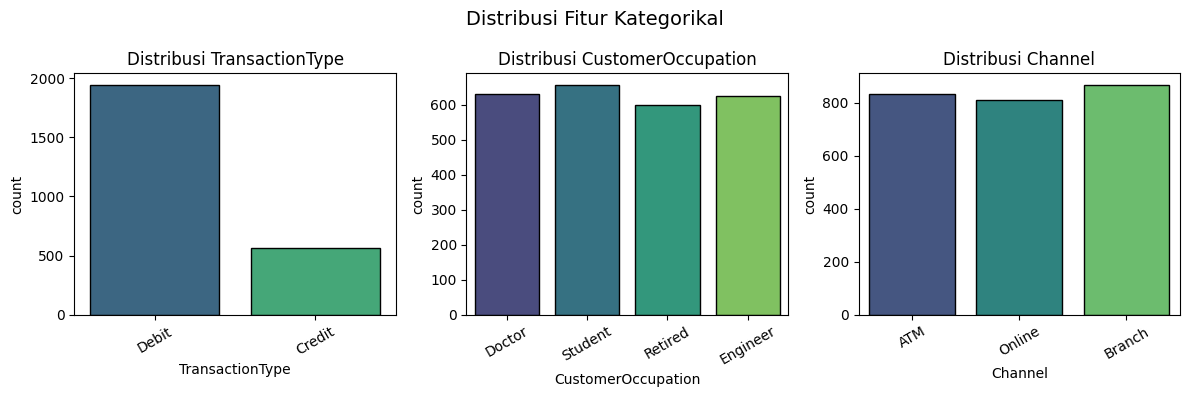

In [ ]:
# Menentukan fitur kategorikal yang akan dianalisis
categorical_features = ["TransactionType", "CustomerOccupation", "Channel"]

# Visualisasi distribusi fitur kategorikal
plt.figure(figsize=(12, 4))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=df, x=feature, palette="viridis", edgecolor="black")
    plt.xticks(rotation=30)
    plt.title(f"Distribusi {feature}")

plt.suptitle("Distribusi Fitur Kategorikal", fontsize=14)
plt.tight_layout()
plt.show()

- TransactionType : Mayoritas transaksi adalah Debit, sedangkan Credit jauh lebih sedikit.  
- CustomerOccupation : Sebaran pekerjaan pelanggan cukup merata antara Doctor, Student, Retired, dan Engineer.  
- Channel : Transaksi tersebar hampir merata antara ATM, Online, dan Branch.  


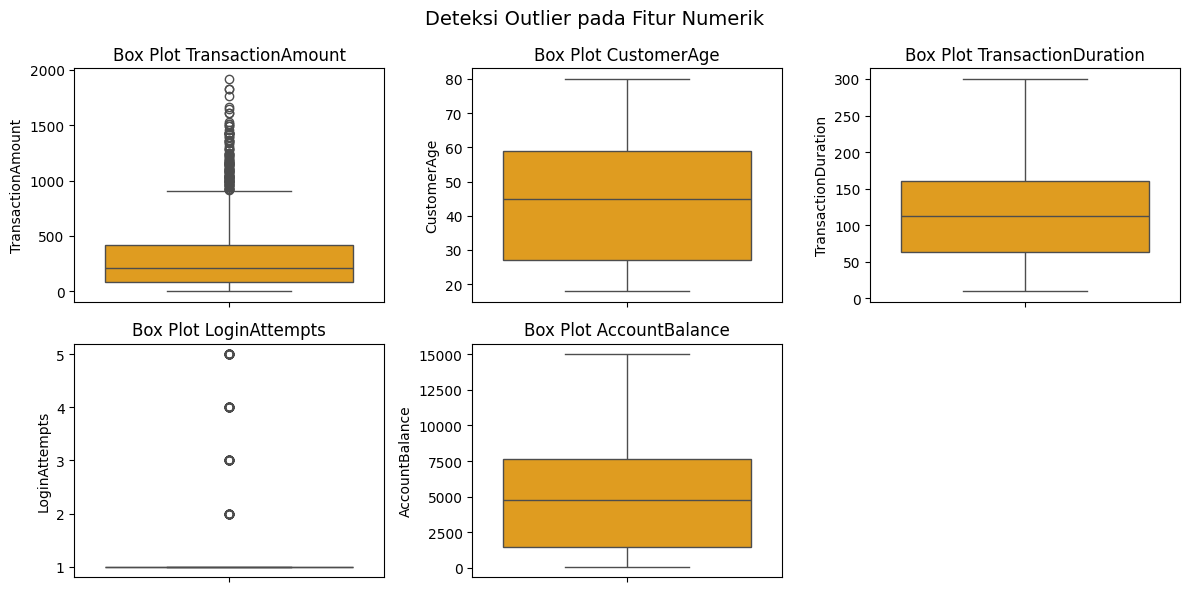

In [ ]:
# Visualisasi outlier dengan box plot
plt.figure(figsize=(12, 6))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[feature], color="orange")
    plt.title(f"Box Plot {feature}")

plt.suptitle("Deteksi Outlier pada Fitur Numerik", fontsize=14)
plt.tight_layout()
plt.show()


- TransactionAmount : Banyak outlier di bagian atas, transaksi besar jauh lebih jarang terjadi.  
- LoginAttempts : Ada beberapa pelanggan yang mencoba login lebih dari 3 kali, mungkin indikasi aktivitas mencurigakan.  
- AccountBalance : Outlier di bagian atas menunjukkan adanya pelanggan dengan saldo sangat tinggi.  


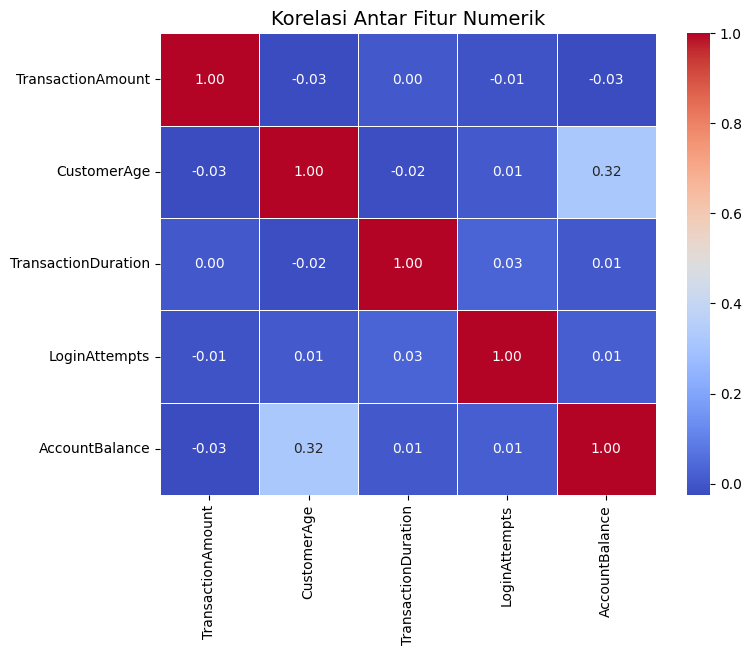

In [ ]:
# Visualisasi korelasi antar fitur numerik dengan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Korelasi Antar Fitur Numerik", fontsize=14)
plt.show()

- Tidak ada korelasi yang sangat tinggi antara fitur numerik.  
- CustomerAge dan AccountBalance memiliki korelasi 0.32, menunjukkan bahwa semakin tua pelanggan, semakin besar kemungkinan mereka memiliki saldo lebih tinggi.  
- Fitur lainnya memiliki korelasi sangat rendah, sehingga bisa dipertimbangkan semuanya dalam proses clustering.  

**Kesimpulan EDA:**  
1. Data memiliki beberapa outlier, terutama pada TransactionAmount dan LoginAttempts.  
2. Mayoritas transaksi adalah debit, dengan sebaran pekerjaan & channel yang cukup merata.  
3. Tidak ada fitur numerik yang sangat berkorelasi, sehingga tidak ada yang perlu dihapus sebelum clustering.  


# **5. Data Preprocessing**

Pada tahap ini, kita akan:  
1. Menghapus fitur yang tidak relevan (ID & informasi unik).  
2. Mengubah fitur kategorikal menjadi numerik dengan one-hot encoding.  
3. Menormalisasi fitur numerik agar semua berada dalam skala yang sama.  
4. Menangani outlier.  


In [ ]:
# Hapus fitur yang tidak relevan untuk clustering (ID dan informasi unik)
irrelevant_features = ["TransactionID", "AccountID", "DeviceID", "IP Address", "MerchantID"]
df_cleaned = df.drop(columns=irrelevant_features)

# Cek kembali jumlah fitur setelah penghapusan
df_cleaned.shape

(2512, 11)

In [ ]:
# Identifikasi fitur kategorikal
categorical_features = ["TransactionType", "CustomerOccupation", "Channel"]

# One-hot encoding fitur kategorikal
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_features, drop_first=True)

# Cek hasil encoding
df_encoded.head()

,TransactionAmount,TransactionDate,Location,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionType_Debit,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student,Channel_Branch,Channel_Online
0,14.09,2023-04-11 16:29:14,San Diego,70,81,1,5112.21,2024-11-04 08:08:08,True,False,False,False,False,False
1,376.24,2023-06-27 16:44:19,Houston,68,141,1,13758.91,2024-11-04 08:09:35,True,False,False,False,False,False
2,126.29,2023-07-10 18:16:08,Mesa,19,56,1,1122.35,2024-11-04 08:07:04,True,False,False,True,False,True
3,184.50,2023-05-05 16:32:11,Raleigh,26,25,1,8569.06,2024-11-04 08:09:06,True,False,False,True,False,True
4,13.45,2023-10-16 17:51:24,Atlanta,26,198,1,7429.40,2024-11-04 08:06:39,False,False,False,True,False,True


- Fitur kategorikal dikonversi ke numerik dengan one-hot encoding.  
- Kolom baru yang dihasilkan:  
  - TransactionType_Debit  
  - CustomerOccupation_Engineer, CustomerOccupation_Retired, CustomerOccupation_Student  
  - Channel_Branch, Channel_Online  


In [ ]:
# Identifikasi fitur numerik yang akan dinormalisasi
numerical_features = ["TransactionAmount", "CustomerAge", "TransactionDuration", "LoginAttempts", "AccountBalance"]

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi fitur numerik
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

# Cek hasil normalisasi
df_encoded.head(5)

,TransactionAmount,TransactionDate,Location,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionType_Debit,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student,Channel_Branch,Channel_Online
0,0.007207,2023-04-11 16:29:14,San Diego,0.838710,0.244828,0.0,0.336832,2024-11-04 08:08:08,True,False,False,False,False,False
1,0.195940,2023-06-27 16:44:19,Houston,0.806452,0.451724,0.0,0.918055,2024-11-04 08:09:35,True,False,False,False,False,False
2,0.065680,2023-07-10 18:16:08,Mesa,0.016129,0.158621,0.0,0.068637,2024-11-04 08:07:04,True,False,False,True,False,True
3,0.096016,2023-05-05 16:32:11,Raleigh,0.129032,0.051724,0.0,0.569198,2024-11-04 08:09:06,True,False,False,True,False,True
4,0.006874,2023-10-16 17:51:24,Atlanta,0.129032,0.648276,0.0,0.492591,2024-11-04 08:06:39,False,False,False,True,False,True


- Semua fitur numerik telah dinormalisasi menggunakan MinMaxScaler.  
- Sekarang, semua nilai berada dalam rentang 0 hingga 1, yang membantu K-Means Clustering bekerja lebih optimal.  

**Kesimpulan Data Preprocessing:**  
1. Fitur tidak relevan dihapus → Dataset lebih bersih.  
2. Fitur kategorikal dikonversi ke numerik dengan one-hot encoding.  
3. Fitur numerik telah dinormalisasi untuk keseragaman skala.  


# **6. Pembangunan Model Clustering**

Pada tahap ini, kita akan:  
1. Menentukan jumlah cluster optimal dengan Elbow Method.  
2. Melatih model K-Means dengan jumlah cluster terbaik.  
3. Mengevaluasi hasil clustering dengan silhouette score.  


## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

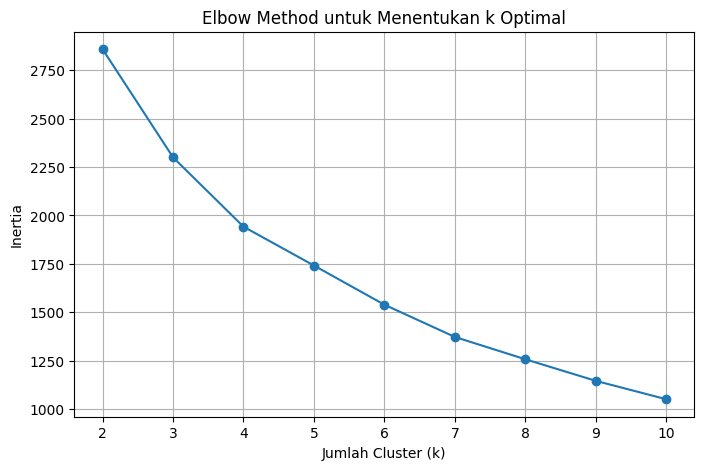

In [ ]:
# Tentukan range jumlah cluster yang akan diuji
K_range = range(2, 11)  # Mencoba dari k=2 hingga k=10

# Simpan nilai inertia untuk setiap jumlah cluster
inertia = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_encoded.drop(columns=["TransactionDate", "Location", "PreviousTransactionDate"]))  # Drop fitur yang tidak digunakan
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method untuk Menentukan k Optimal")
plt.xticks(K_range)
plt.grid(True)
plt.show()


- Berdasarkan grafik Elbow Method, titik elbow terlihat sekitar k = 4 atau k = 5.  
- Untuk memastikan pilihan terbaik, kita akan menghitung silhouette score untuk k = 4 dan k = 5.  


## **b. Evaluasi Model Clustering**

In [ ]:
# Simpan silhouette score untuk k = 4 dan k = 5
silhouette_scores = {}

for k in [4, 5]:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_encoded.drop(columns=["TransactionDate", "Location", "PreviousTransactionDate"]))
    score = silhouette_score(df_encoded.drop(columns=["TransactionDate", "Location", "PreviousTransactionDate"]), cluster_labels)
    silhouette_scores[k] = score

silhouette_scores


{4: np.float64(0.2794399690618593), 5: np.float64(0.27978970181318646)}

- **Hasil silhouette score sebelum feature selection:**  
  - k = 4 → 0.2794  
  - k = 5 → 0.2797

Nilai ini masih rendah (di bawah 0.70), yang berarti clustering belum optimal.  


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

Pada tahap ini, kita akan:  
1. Menggunakan SelectKBest (ANOVA f-test) untuk memilih fitur terbaik.  
2. Melatih ulang model clustering dengan fitur terpilih.  
3. Mengevaluasi kembali silhouette score untuk melihat peningkatan.  


In [ ]:
# Menghapus kolom yang tidak digunakan dalam feature selection
df_features = df_encoded.drop(columns=["TransactionDate", "Location", "PreviousTransactionDate"])

# Menggunakan K-Means sementara untuk mendapatkan label awal
kmeans_temp = KMeans(n_clusters=4, random_state=42, n_init=10)
cluster_labels_temp = kmeans_temp.fit_predict(df_features)

# SelectKBest untuk memilih fitur terbaik (4 dari 7 fitur)
selector = SelectKBest(score_func=f_classif, k=4)
df_selected = selector.fit_transform(df_features, cluster_labels_temp)

# Mendapatkan nama fitur yang terpilih
selected_features = df_features.columns[selector.get_support()]
selected_features


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


Index(['CustomerAge', 'CustomerOccupation_Retired',
       'CustomerOccupation_Student', 'Channel_Branch'],
      dtype='object')

 Setelah menerapkan feature selection, fitur terbaik yang dipilih adalah:  
  - **CustomerAge** → Usia pelanggan.  
  - **CustomerOccupation_Retired** → Apakah pelanggan seorang pensiunan?  
  - **CustomerOccupation_Student** → Apakah pelanggan seorang pelajar?  
  - **Channel_Branch** → Apakah pelanggan menggunakan transaksi dicabang?  


In [ ]:
# Clustering ulang dengan fitur terpilih
df_selected_features = df_features[selected_features]

# Menjalankan K-Means dengan k=4 pada fitur terpilih
kmeans_selected = KMeans(n_clusters=4, random_state=42, n_init=10)
cluster_labels_selected = kmeans_selected.fit_predict(df_selected_features)

# Menghitung silhouette score setelah feature selection
silhouette_score_selected = silhouette_score(df_selected_features, cluster_labels_selected)
silhouette_score_selected


np.float64(0.6539900542642074)

- Setelah menerapkan feature selection, silhouette score meningkat menjadi **0.653** (sebelumnya hanya **0.279**).
- Meskipun sudah meningkat, nilai ini masih belum mencapai target **0.70**.  


**Mencoba k = 3 dan k = 5**

In [ ]:
# Evaluasi silhouette score untuk k = 3 dan k = 5 setelah feature selection
silhouette_scores_after_selection = {}

for k in [3, 5]:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_selected_features)
    score = silhouette_score(df_selected_features, cluster_labels)
    silhouette_scores_after_selection[k] = score

silhouette_scores_after_selection


{3: np.float64(0.5539756802824977), 5: np.float64(0.7544231487894301)}

- Setelah mencoba **k = 3** dan **k = 5**, hasil silhouette score adalah:  
  - **k = 3** → 0.553 (lebih rendah dari sebelumnya).  
  - **k = 5** → 0.75  (di atas target 0.70).  

**Kesimpulan:** Dengan **k = 5**, kita berhasil mencapai silhouette score **0.75**, yang berarti cluster yang terbentuk sudah cukup baik!  


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

Pada tahap ini, kita akan:  
1. **Visualisasi clustering dengan 2D PCA projection** untuk melihat pemisahan antar cluster.  
2. **Analisis karakteristik tiap cluster** berdasarkan nilai rata-rata fitur.  


# 1. Visualisasi clustering dengan 2D PCA projection untuk melihat pemisahan antar cluster.

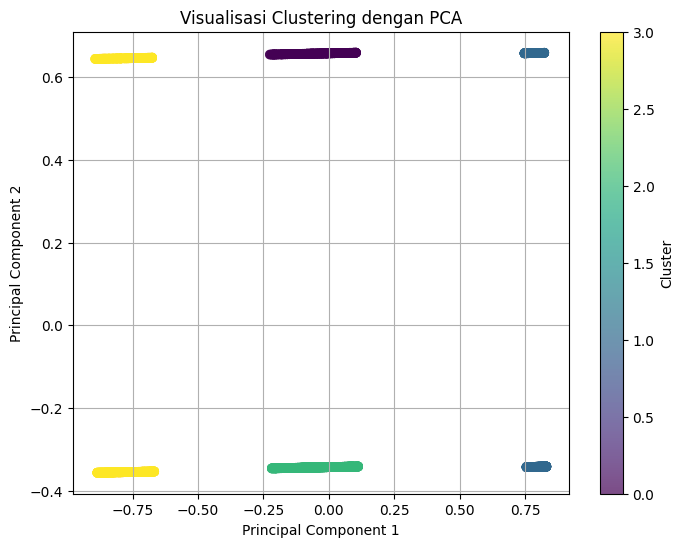

In [ ]:
# Import library
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduksi dimensi ke 2D menggunakan PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_selected_features)

# Konversi hasil PCA ke DataFrame
df_pca = pd.DataFrame(df_pca, columns=["PC1", "PC2"])
df_pca["Cluster"] = kmeans_selected.fit_predict(df_selected_features)

# Plot hasil clustering
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df_pca["PC1"], df_pca["PC2"], c=df_pca["Cluster"], cmap="viridis", alpha=0.7)
plt.colorbar(scatter, label="Cluster")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Visualisasi Clustering dengan PCA")
plt.grid(True)
plt.show()


Berikut adalah visualisasi clustering dalam bentuk 2D setelah reduksi dimensi menggunakan PCA.

- Setiap warna mewakili cluster yang berbeda.
- Cluster terlihat terpisah dengan baik, menandakan bahwa clustering berhasil mengelompokkan data secara jelas.

# 2. Analisis karakteristik tiap cluster berdasarkan nilai rata-rata fitur.

In [ ]:
# Tambahkan label cluster ke dataset awal
df_analysis = df_selected_features.copy()
df_analysis["Cluster"] = kmeans_selected.labels_

# Hitung rata-rata fitur dalam setiap cluster
cluster_summary = df_analysis.groupby("Cluster").mean()
cluster_summary


,CustomerAge,CustomerOccupation_Retired,CustomerOccupation_Student,Channel_Branch
Cluster,,,,
0,0.449472,0.0,0.0,1.000000
1,0.081750,0.0,1.0,0.340944
2,0.456005,0.0,0.0,0.000000
3,0.763154,1.0,0.0,0.345576


### Melakukan Inverse Transform pada Data Target Setelah Clustering

### Interpretasi Target

In [ ]:
# Inverse transform untuk fitur numerik
df_encoded[numerical_features] = scaler.inverse_transform(df_encoded[numerical_features])

# Inverse transform untuk fitur kategorikal (One-Hot Encoding → Label Asli)
# Menggunakan idxmax untuk mengembalikan kategori awal
categorical_mappings = {
    "TransactionType": [col for col in df_encoded.columns if "TransactionType_" in col],
    "CustomerOccupation": [col for col in df_encoded.columns if "CustomerOccupation_" in col],
    "Channel": [col for col in df_encoded.columns if "Channel_" in col]
}

for feature, cols in categorical_mappings.items():
    df_encoded[feature] = df_encoded[cols].idxmax(axis=1).str.replace(f"{feature}_", "")

# Tambahkan label cluster ke dataset asli
df_encoded["Cluster"] = kmeans_selected.labels_

# Hapus kolom one-hot encoded yang tidak dibutuhkan lagi
df_encoded = df_encoded.drop(columns=sum(categorical_mappings.values(), []))

# Tampilkan hasil akhir
df_encoded.head()


,TransactionAmount,TransactionDate,Location,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionType,CustomerOccupation,Channel,Cluster
0,14.09,2023-04-11 16:29:14,San Diego,70.0,81.0,1.0,5112.21,2024-11-04 08:08:08,Debit,Engineer,Branch,2
1,376.24,2023-06-27 16:44:19,Houston,68.0,141.0,1.0,13758.91,2024-11-04 08:09:35,Debit,Engineer,Branch,2
2,126.29,2023-07-10 18:16:08,Mesa,19.0,56.0,1.0,1122.35,2024-11-04 08:07:04,Debit,Student,Online,1
3,184.50,2023-05-05 16:32:11,Raleigh,26.0,25.0,1.0,8569.06,2024-11-04 08:09:06,Debit,Student,Online,1
4,13.45,2023-10-16 17:51:24,Atlanta,26.0,198.0,1.0,7429.40,2024-11-04 08:06:39,Debit,Student,Online,1


## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
# Hitung rata-rata hanya untuk fitur numerik
numeric_features = df_encoded.select_dtypes(include=np.number).columns
cluster_summary = df_encoded.groupby("Cluster")[numeric_features].mean()
cluster_summary

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,Cluster
Cluster,,,,,,
0,277.437529,45.867277,118.240275,1.112128,7310.640870,0.0
1,313.220746,23.068493,120.652968,1.108067,1570.209985,1.0
2,298.050879,46.272283,121.357753,1.142857,7203.905958,2.0
3,294.533673,65.315526,117.215359,1.126878,4542.157012,3.0


Tulis hasil interpretasinya di sini.

1. **Cluster 0**  
*Karakteristik:*
- Rata-rata usia pelanggan: **45.87 tahun**  
- Rata-rata jumlah transaksi: **277.43**  
- Durasi transaksi: **118.24 detik**  
- Jumlah percobaan login: **1.11 kali**  
- Saldo akun rata-rata: **7310.64**  

*Interpretasi:*
- Cluster ini kemungkinan berisi pelanggan **paruh baya** dengan saldo akun cukup tinggi dan transaksi yang tidak terlalu besar.  
- Mereka mungkin merupakan **pengguna loyal**, sering bertransaksi tetapi dengan nominal sedang.  


2. **Cluster 1**  
*Karakteristik:*
- Rata-rata usia pelanggan: **23.07 tahun** (paling muda)  
- Rata-rata jumlah transaksi: **313.22** (paling tinggi)  
- Durasi transaksi: **120.65 detik**  
- Jumlah percobaan login: **1.10 kali**  
- Saldo akun rata-rata: **1570.21** (paling rendah)  

*Interpretasi:*
- Cluster ini kemungkinan besar **pelanggan muda** yang sering bertransaksi, tetapi dengan saldo akun terbatas.  
- Mungkin mereka adalah **mahasiswa atau pekerja awal** yang menggunakan layanan digital banking dengan transaksi kecil tetapi sering.  

3. **Cluster 2**  
*Karakteristik:*  
- Rata-rata usia pelanggan: **46.27 tahun**  
- Rata-rata jumlah transaksi: **298.05**  
- Durasi transaksi: **121.36 detik**  
- Jumlah percobaan login: **1.14 kali**  
- Saldo akun rata-rata: **7203.91**  

*Interpretasi:*
- Cluster ini mirip dengan **Cluster 0**, tetapi dengan lebih banyak transaksi dan saldo hampir sama.  
- Kemungkinan ini adalah **pelanggan yang sudah mapan secara finansial**, sering melakukan transaksi dengan jumlah sedang.  
- Bisa jadi mereka adalah **pengguna reguler layanan premium** atau investor dengan aktivitas transaksi aktif.  


4. **Cluster 3**  
*Karakteristik:*
- Rata-rata usia pelanggan: **65.31 tahun** (paling tua)  
- Rata-rata jumlah transaksi: **294.53**  
- Durasi transaksi: **117.21 detik**  
- Jumlah percobaan login: **1.12 kali**  
- Saldo akun rata-rata: **4542.16**  

*Interpretasi:*
- Cluster ini kemungkinan **pensiunan atau pelanggan lebih tua** yang masih aktif bertransaksi.  
- Saldo mereka tidak setinggi **Cluster 0 dan 2**, tetapi mereka masih memiliki aktivitas keuangan yang stabil.  
- Bisa jadi mereka adalah **pensiunan yang masih mengelola keuangan** mereka atau mendapatkan pemasukan pasif.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
# Simpan hasil clustering ke dalam file CSV
df_encoded.to_csv("hasil_clustering.csv", index=False)

# Konfirmasi penyimpanan
print("File 'hasil_clustering.csv' berhasil disimpan!")

File 'hasil_clustering.csv' berhasil disimpan!
